## Data featurization
to have a good model perfermance and since we only have a small dataset, using more features can be benefecial and increase the accuracy of our model in predicting the specific heat capacity.
To do that, we will use the "composition-based feature vectors", or CBFVs.
CBFV works simply by giving the chemical formula as an input, then the chemical formula will be transformed into usable features which are the thermochemical properties of that specific formula which descibe a type of material.

### Loading data

In [36]:
import pandas as pd 

df_train = pd.read_csv(r'C:\Users\HP\Documents\Cleaned Cp\cp_data_train.csv')
df_test = pd.read_csv(r'C:\Users\HP\Documents\Cleaned Cp\cp_data_test.csv')

### Generating features using CBFV

The `generate_features` function from the CBFV package expects an input DataFrame containing at least the columns `['formula', 'target']`.

In [37]:
from CBFV.cbfv.composition import generate_features

In [38]:
dict = {'Formula': 'formula','Heat Capacity' : 'target', }
df_train = df_train.rename( columns = dict)
df_test = df_test.rename( columns = dict)

df_train.columns #verified

Index(['formula', 'Temperature', 'target'], dtype='object')

In [39]:
X_train, y_train, formulae_train, skipped_train = generate_features(df_train, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)
X_test, y_test, formulae_test, skipped_test = generate_features(df_test, elem_prop='oliynyk', drop_duplicates=False, extend_features=True, sum_feat=True)

Assigning Features...:  12%|██████▍                                               | 385/3221 [00:00<00:00, 3813.98it/s]

	Featurizing Compositions...


Assigning Features...: 100%|█████████████████████████████████████████████████████| 3221/3221 [00:01<00:00, 2615.94it/s]


	Creating Pandas Objects...


Assigning Features...: 100%|███████████████████████████████████████████████████████| 370/370 [00:00<00:00, 4068.32it/s]


	Featurizing Compositions...
	Creating Pandas Objects...


### Let's look at the magic

In [40]:
X_test.head()

,sum_Atomic_Number,sum_Atomic_Weight,sum_Period,sum_group,sum_families,sum_Metal,sum_Nonmetal,sum_Metalliod,sum_Mendeleev_Number,sum_l_quantum_number,...,range_Melting_point_(K),range_Boiling_Point_(K),range_Density_(g/mL),range_specific_heat_(J/g_K)_,range_heat_of_fusion_(kJ/mol)_,range_heat_of_vaporization_(kJ/mol)_,range_thermal_conductivity_(W/(m_K))_,range_heat_atomization(kJ/mol),range_Cohesive_energy,Temperature
0,74.0,171.34168,12.0,36.0,30.0,1.0,4.0,0.0,367.0,2.0,...,206679.206667,767920.602222,2.721056,42.050457,12.011776,4361.396033,74.390486,796.222222,1.221422,900.00
1,74.0,171.34168,12.0,36.0,30.0,1.0,4.0,0.0,367.0,2.0,...,206679.206667,767920.602222,2.721056,42.050457,12.011776,4361.396033,74.390486,796.222222,1.221422,800.00
2,74.0,171.34168,12.0,36.0,30.0,1.0,4.0,0.0,367.0,2.0,...,206679.206667,767920.602222,2.721056,42.050457,12.011776,4361.396033,74.390486,796.222222,1.221422,700.00
3,74.0,171.34168,12.0,36.0,30.0,1.0,4.0,0.0,367.0,2.0,...,206679.206667,767920.602222,2.721056,42.050457,12.011776,4361.396033,74.390486,796.222222,1.221422,681.15
4,74.0,171.34168,12.0,36.0,30.0,1.0,4.0,0.0,367.0,2.0,...,206679.206667,767920.602222,2.721056,42.050457,12.011776,4361.396033,74.390486,796.222222,1.221422,600.00


We know have 177 features describing each formula(chemical composition) which represent the thermochemical/ thermophysical proprerties!

### Plotting heat map for fun lol

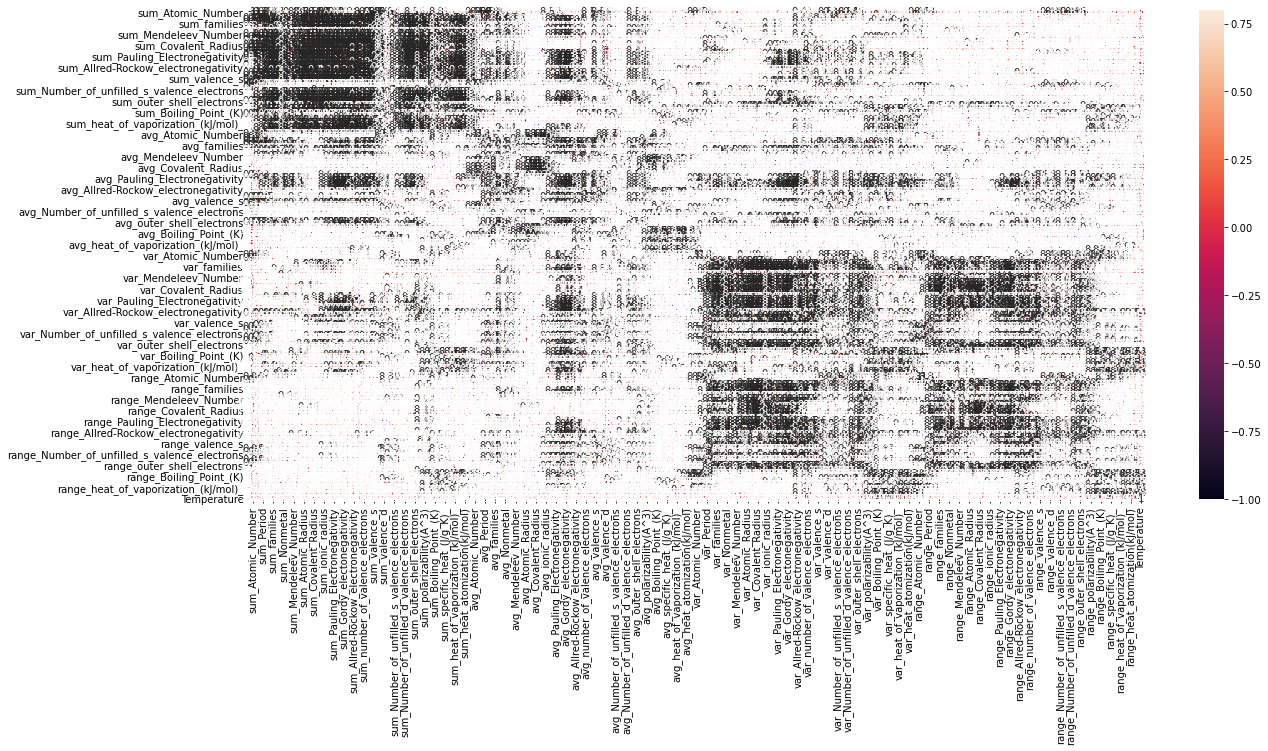

In [41]:
#correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
X_train['Temperature'].convert_dtypes(convert_integer=True)
corrmat = X_train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);


### Data normalizating and scalling


Normalizating our data means that we simply scale down the distribution of the order of magnitude to have our feature distribution between 0 and 1. Scalling means we will change our distribution so that the mean is equal to 0 and the standard deviation is equal to 1. This partially correct the difference in the distribution of our features.

### Importing libraries

In [42]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = normalize(X_train)
X_test = normalize(X_test)


### Preparing our machine learning models
We will use these models then we will compare their accuracy and find out which is the best model:
* Multi-linear regression
* Ridge regression
* Support vector machine
* Random forest
* k-nearest neighbors

### Importing libraries

In [44]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score, mean_squared_error


## calling and fitting our models

* call the model
* fit the model using the training data
* use the fitted model to generate predictions from the testing set
* evaluate the performance of the model using the predictions
* campare the accuricies

In [46]:
models = []
models.append(("LinearRegression",LinearRegression()))
models.append(("Ridge",Ridge()))
models.append(("SVM",svm.SVR()))
models.append(("KNeighbors",KNeighborsRegressor()))
models.append(("RandomForest",RandomForestRegressor()))

names = []
r2 = []
mse = []
for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    r2.append(r2_score(y_test,y_pred))
    mse.append (mean_squared_error(y_test,y_pred))
    names.append(name)

for i in range(len(names)):
    print(names[i],': ', 'MSE: ', mse[i], 'R squared: ', r2[i], '\n')


LinearRegression :  MSE:  5.4296663701251124e+23 R squared:  -8.938079671471935e+19 

Ridge :  MSE:  1973.6336639541496 R squared:  0.6751090448617236 

SVM :  MSE:  2481.279160031281 R squared:  0.5915426601245939 

KNeighbors :  MSE:  1220.654680499081 R squared:  0.7990611569490501 

RandomForest :  MSE:  1678.4085088603094 R squared:  0.7237077206803744 

